In [2]:
import numpy as np
import pandas as pd
import os 
import warnings
import matplotlib.pyplot as plt
import math
from Voting_Smoothing import *

warnings.filterwarnings("ignore")

In [10]:
concat = pd.read_csv('CSVs/grouping/Concatenated.csv')
concat.head()

,File_name,Sequence_ID,Site,Score,Starting_position,Width,Score_group,Algorithm,Subgroup
0,CRP,4614744-4614762-forward,AATTGTGATGTGTAT,3.418,253.0,15.0,5,bioprospector,CRP_5_4614744-4614762-forward
1,CRP,3490065-3490083-reverse,ATTTTAAGAGGTGAT,3.418,193.0,15.0,5,bioprospector,CRP_5_3490065-3490083-reverse
2,CRP,702999-703017-forward,TATTGAGGTGAATAA,3.418,50.0,15.0,5,bioprospector,CRP_5_702999-703017-forward
3,CRP,702999-703017-forward,AAATTTAATTCGTAT,3.418,248.0,15.0,5,bioprospector,CRP_5_702999-703017-forward
4,CRP,702999-703017-forward,AATTGTACTGCCGAT,3.418,307.0,15.0,5,bioprospector,CRP_5_702999-703017-forward


In [11]:
concat.shape

(227952, 9)

In [12]:
streme_results = pd.read_csv('CSVs/stage_1/streme_sites.csv')
streme_results = streme_results.iloc[:, 1:]
streme_results.head()

,File_name,Site,Score,Width
0,TyrR,ATTGACGCAGGGATG,0.0007,15
1,TyrR,ATTGACGCAGGCATG,0.0007,15
2,TyrR,ATTGGCGCAGGGATG,0.0007,15
3,TyrR,ATTGGCGCAGGCATG,0.0007,15
4,TyrR,CGATAAGATGAATAT,0.0007,15


# **Weights**

In [15]:
def add_weights_to_concat(concat, streme_results):
    # Initialize the 'Weights' column to 1
    concat['Weights'] = 1

    # Define the weights for different levels of similarity
    similarity_weights = {0: 1, 1: 0.8, 2: 0.6, 3: 0.4, 4: 0.2, 5: 0.1}

    # Iterate over each row in the concat dataframe
    for _, row in concat.iterrows():
        # Check if the File_name exists in the streme_results dataframe
        if row['File_name'] in streme_results['File_name'].values:
            # Get the corresponding Site
            site = streme_results.loc[streme_results['File_name'] == row['File_name'], 'Site'].values[0]

            # Calculate the similarity level between the Site and the 'Site' column in concat
            similarity_level = sum(s != t for s, t in zip(site, row['Site']))

            # Add the corresponding weight based on the similarity level
            concat.loc[_, 'Weights'] += similarity_weights.get(similarity_level, 0)

    return concat


In [16]:
updated_concat = add_weights_to_concat(concat, streme_results)

KeyboardInterrupt: 

In [ ]:
updated_concat.Weights.unique()

# **Voting**

In [4]:
concat.head()

,File_name,Sequence_ID,Site,Score,Starting_position,Width,Score_group,Algorithm,Subgroup
0,CRP,4614744-4614762-forward,AATTGTGATGTGTAT,3.418,253.0,15.0,5,bioprospector,CRP_5_4614744-4614762-forward
1,CRP,3490065-3490083-reverse,ATTTTAAGAGGTGAT,3.418,193.0,15.0,5,bioprospector,CRP_5_3490065-3490083-reverse
2,CRP,702999-703017-forward,TATTGAGGTGAATAA,3.418,50.0,15.0,5,bioprospector,CRP_5_702999-703017-forward
3,CRP,702999-703017-forward,AAATTTAATTCGTAT,3.418,248.0,15.0,5,bioprospector,CRP_5_702999-703017-forward
4,CRP,702999-703017-forward,AATTGTACTGCCGAT,3.418,307.0,15.0,5,bioprospector,CRP_5_702999-703017-forward


In [5]:
# fill the NaN values with the length of the Sites
concat['Width'].fillna(concat['Site'].str.len(), inplace=True)

In [6]:
# Create the range of the positions Using the Width and the Starting_position
concat['Position_Range'] = concat.apply(lambda row: range(int(row['Starting_position']), int(row['Starting_position'] + row['Width'])), axis=1)
concat.head()

,File_name,Sequence_ID,Site,Score,Starting_position,Width,Score_group,Algorithm,Subgroup,Position_Range
0,CRP,4614744-4614762-forward,AATTGTGATGTGTAT,3.418,253.0,15.0,5,bioprospector,CRP_5_4614744-4614762-forward,"(253, 254, 255, 256, 257, 258, 259, 260, 261, ..."
1,CRP,3490065-3490083-reverse,ATTTTAAGAGGTGAT,3.418,193.0,15.0,5,bioprospector,CRP_5_3490065-3490083-reverse,"(193, 194, 195, 196, 197, 198, 199, 200, 201, ..."
2,CRP,702999-703017-forward,TATTGAGGTGAATAA,3.418,50.0,15.0,5,bioprospector,CRP_5_702999-703017-forward,"(50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 6..."
3,CRP,702999-703017-forward,AAATTTAATTCGTAT,3.418,248.0,15.0,5,bioprospector,CRP_5_702999-703017-forward,"(248, 249, 250, 251, 252, 253, 254, 255, 256, ..."
4,CRP,702999-703017-forward,AATTGTACTGCCGAT,3.418,307.0,15.0,5,bioprospector,CRP_5_702999-703017-forward,"(307, 308, 309, 310, 311, 312, 313, 314, 315, ..."


In [7]:
voting_results = calculate_voting_results(concat)
voting_results.head()

Position,1,2,3,4,5,6,7,8,9,10,...,466,467,468,469,470,471,472,473,474,475
Subgroup,,,,,,,,,,,,,,,,,,,,,
Ada_1_209398-209425-forward,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_1_2145603-2145630-reverse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_1_2308475-2308502-reverse,0.0,0.0,0.0,1.0,21.0,21.0,24.0,24.0,24.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_2_209398-209425-forward,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ada_2_2145603-2145630-reverse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


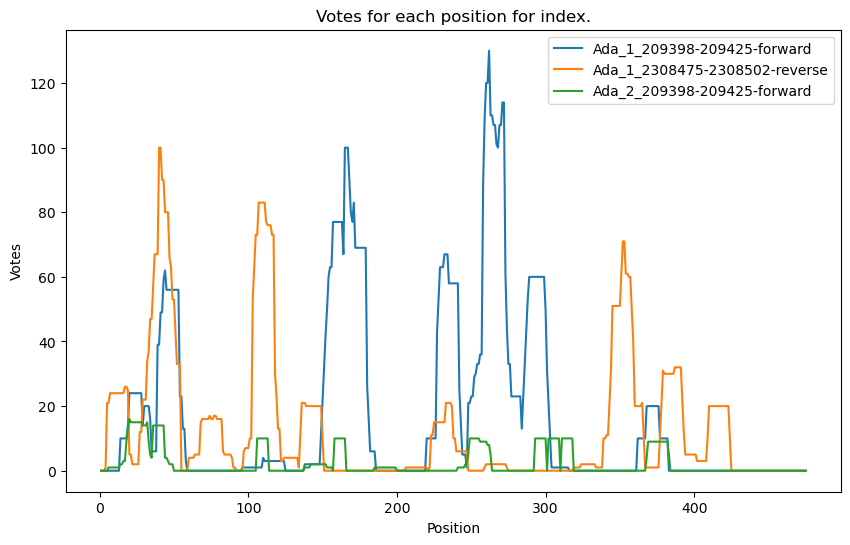

In [8]:
# Random indexes
index_to_plot = ['Ada_1_209398-209425-forward', 'Ada_1_2308475-2308502-reverse','Ada_2_209398-209425-forward']

plt.figure(figsize=(10, 6))

for index in index_to_plot:
    plt.plot(voting_results.columns, voting_results.loc[index], label=index)

plt.xlabel('Position')
plt.ylabel('Votes')
plt.title('Votes for each position for index.')
plt.legend()
plt.show()


# **Smoothing**

In [9]:
smoothed_results = apply_smoothing(concat, 'Width', voting_results)

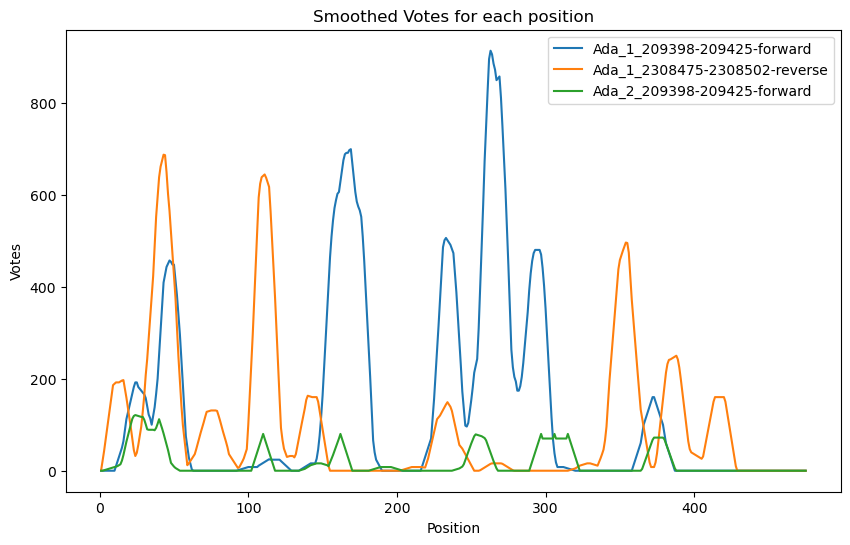

In [10]:
plt.figure(figsize=(10, 6))

for index in index_to_plot:
    plt.plot(smoothed_results.columns, smoothed_results.loc[index], label=index)

plt.xlabel('Position')
plt.ylabel('Votes')
plt.title('Smoothed Votes for each position')
plt.legend()
plt.show()


# **Extraction**

In [11]:
max_values_df = get_max_and_range(smoothed_results)
max_values_df.head()

,Position,Max_Value,Range
Subgroup,,,
Ada_1_209398-209425-forward,263,913.0,"(256, 257, 258, 259, 260, 261, 262, 263, 264, ..."
Ada_1_2145603-2145630-reverse,157,511.0,"(150, 151, 152, 153, 154, 155, 156, 157, 158, ..."
Ada_1_2308475-2308502-reverse,43,687.0,"(36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4..."
Ada_2_209398-209425-forward,24,121.0,"(17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 2..."
Ada_2_2145603-2145630-reverse,386,96.0,"(379, 380, 381, 382, 383, 384, 385, 386, 387, ..."


In [12]:
max_values_df.to_csv('CSVs/extraction/positions.csv')

# **Extra Fun**

In [13]:
starting_position_counts ,site_counts = counts_of_common(concat)

In [14]:
def plot_starting_position_subplots(starting_position_counts, subgroups):
    num_subplots = len(subgroups)
    num_cols = min(num_subplots, 3)
    num_rows = (num_subplots - 1) // num_cols + 1

    if num_subplots == 1:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.bar(*zip(*starting_position_counts[subgroups[0]].items()))
        ax.set_xlabel('Starting Position')
        ax.set_ylabel('Count')
        ax.set_title(f'Starting Position Counts - Subgroup: {subgroups[0]}')
        ax.tick_params(axis='x', rotation=90)
    else:
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
        fig.subplots_adjust(hspace=0.4)

        for i, subgroup in enumerate(subgroups):
            counts = starting_position_counts[subgroup]
            positions = list(counts.keys())
            counts = list(counts.values())

            if num_rows > 1:
                ax = axes[i // num_cols, i % num_cols]
            else:
                ax = axes[i % num_cols]

            ax.bar(positions, counts)
            ax.set_xlabel('Starting Position')
            ax.set_ylabel('Count')
            ax.set_title(f'{subgroup}')
            ax.tick_params(axis='x', rotation=90)

    plt.show()

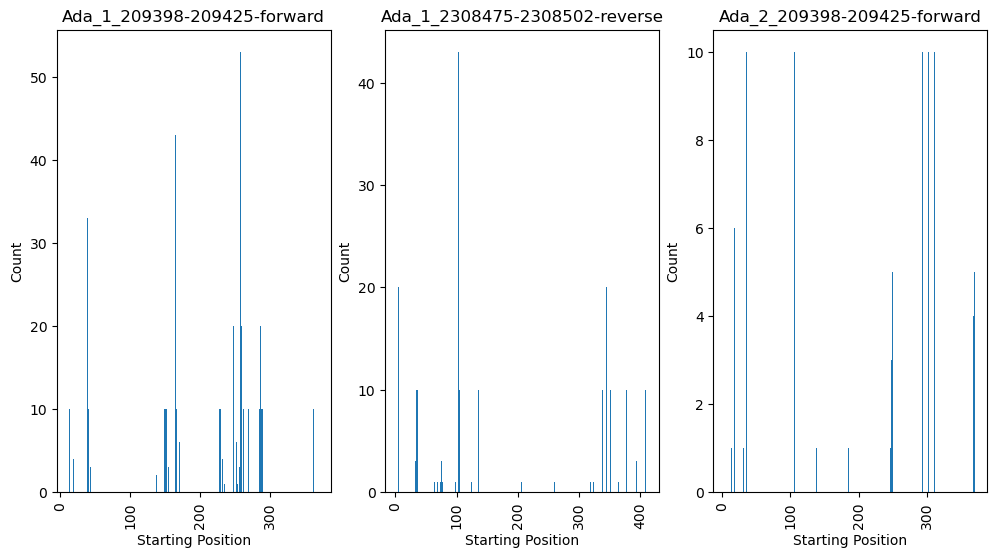

In [15]:
plot_starting_position_subplots(starting_position_counts, index_to_plot)